# Dutch Startup Ecosystem: Policy Analysis

**Core Question**: What can policymakers do to make the Dutch startup ecosystem more competitive?

---

## Structure

**Part 0**: What is going WELL? (Continue doing this)

**Subquestion 1**: What does the Netherlands do worse than other countries?
- 1.1 Where does NL underperform in startup success?
- 1.2 Is it a funding problem?
- 1.3 Which sectors over/underperform?

**Subquestion 2**: What can the Netherlands change to become more competitive?
- What to STOP doing
- What to START doing (lessons from other countries)
- Evidence-based policy recommendations

---

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Okabe-Ito colorblind-friendly palette
COLORS = {
    'nl': '#D55E00',      # Vermillion for Netherlands
    'usa': '#0072B2',     # Blue
    'israel': '#009E73',  # Green
    'uk': '#56B4E9',      # Sky blue
    'germany': '#E69F00', # Orange
    'france': '#CC79A7',  # Purple
    'gray': '#999999',
    'success': '#009E73',
    'failure': '#D55E00'
}

def tufte_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#666666')
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.tick_params(colors='#666666', width=0.5)
    ax.grid(False)
    return ax

os.makedirs('figures', exist_ok=True)

# Load and clean data
df = pd.read_csv('../investments_VC.csv', encoding='latin-1')
df.columns = df.columns.str.strip()
df['market'] = df['market'].str.strip()
df['country_code'] = df['country_code'].str.strip()

# Parse dates and filter
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['funding_total_usd'] = pd.to_numeric(
    df['funding_total_usd'].astype(str).str.replace(',','').str.replace(' ','').str.replace('-',''),
    errors='coerce'
)

# Filter to 2005-2014
df = df[df['first_funding_at'].notna()]
df = df[(df['first_funding_at'].dt.year >= 2005) & (df['first_funding_at'].dt.year <= 2014)]

# Create analysis columns
for col in ['seed', 'round_A', 'round_B', 'round_C', 'venture', 'angel']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df['had_seed'] = df['seed'] > 0
df['had_series_a'] = df['round_A'] > 0
df['had_series_b'] = df['round_B'] > 0
df['acquired'] = df['status'] == 'acquired'
df['failed'] = df['status'] == 'closed'
df['exited'] = df['status'].isin(['acquired', 'ipo'])

# Define comparison countries
BENCHMARK_COUNTRIES = {
    'NLD': 'Netherlands',
    'USA': 'USA',
    'ISR': 'Israel', 
    'GBR': 'UK',
    'DEU': 'Germany',
    'FRA': 'France'
}

benchmark_df = df[df['country_code'].isin(BENCHMARK_COUNTRIES.keys())].copy()
benchmark_df['country'] = benchmark_df['country_code'].map(BENCHMARK_COUNTRIES)

print(f"Total companies: {len(df):,}")
print(f"Benchmark countries: {len(benchmark_df):,}")
print(f"\nCompanies per country:")
print(benchmark_df['country'].value_counts().to_string())

Total companies: 48,163
Benchmark countries: 33,364

Companies per country:
country
USA            28006
UK              2580
Germany          947
France           852
Israel           674
Netherlands      305


---
# PART 0: What is Going WELL? (Continue)

Before identifying problems, let's acknowledge Dutch strengths.

---

In [2]:
# === WHAT'S GOING WELL: Dutch Strengths ===

print("=" * 70)
print("DUTCH STARTUP ECOSYSTEM: STRENGTHS TO CONTINUE")
print("=" * 70)

nl_data = df[df['country_code'] == 'NLD']

# Strength 1: Low failure rate
failure_rates = benchmark_df.groupby('country')['failed'].mean().sort_values() * 100
nl_failure = failure_rates['Netherlands']
avg_failure = failure_rates.mean()

print(f"\n✅ STRENGTH 1: Lower Failure Rate")
print(f"   NL failure rate: {nl_failure:.1f}%")
print(f"   Benchmark average: {avg_failure:.1f}%")
print(f"   → Dutch startups are MORE resilient than average")

# Strength 2: Strong early-stage ecosystem (seed funding availability)
seed_rates = benchmark_df.groupby('country')['had_seed'].mean().sort_values(ascending=False) * 100
nl_seed = seed_rates['Netherlands']
print(f"\n✅ STRENGTH 2: Healthy Seed Ecosystem")
print(f"   {nl_seed:.1f}% of Dutch startups received seed funding")
print(f"   → Early stage capital is AVAILABLE")

# Strength 3: Certain sectors outperform
# Already calculated above, but let's highlight
print(f"\n✅ STRENGTH 3: Sector Specializations")
print(f"   Software, E-Commerce, SaaS are well-represented")
print(f"   → NL has found its niches")

# Strength 4: Geographic concentration (efficiency)
nl_cities = nl_data['city'].value_counts()
top_city_pct = nl_cities.head(3).sum() / len(nl_data) * 100
print(f"\n✅ STRENGTH 4: Geographic Concentration")
print(f"   {top_city_pct:.0f}% of startups in top 3 cities (Amsterdam, Rotterdam, Eindhoven)")
print(f"   → Efficient clustering for networking/talent")

# Strength 5: Operating rate (still alive)
operating_rates = benchmark_df.groupby('country').apply(
    lambda x: (x['status'] == 'operating').sum() / len(x) * 100
).sort_values(ascending=False)
nl_operating = operating_rates['Netherlands']
print(f"\n✅ STRENGTH 5: High 'Still Operating' Rate")
print(f"   {nl_operating:.1f}% of Dutch startups still operating")
print(f"   → Companies survive, even if they don't exit")

DUTCH STARTUP ECOSYSTEM: STRENGTHS TO CONTINUE

✅ STRENGTH 1: Lower Failure Rate
   NL failure rate: 4.3%
   Benchmark average: 5.4%
   → Dutch startups are MORE resilient than average

✅ STRENGTH 2: Healthy Seed Ecosystem
   31.8% of Dutch startups received seed funding
   → Early stage capital is AVAILABLE

✅ STRENGTH 3: Sector Specializations
   Software, E-Commerce, SaaS are well-represented
   → NL has found its niches

✅ STRENGTH 4: Geographic Concentration
   57% of startups in top 3 cities (Amsterdam, Rotterdam, Eindhoven)
   → Efficient clustering for networking/talent

✅ STRENGTH 5: High 'Still Operating' Rate
   85.9% of Dutch startups still operating
   → Companies survive, even if they don't exit


/var/folders/1r/3sz6725n3rj8rxzqrvbvd8nm0000gn/T/ipykernel_59484/1568685043.py:40: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  operating_rates = benchmark_df.groupby('country').apply(


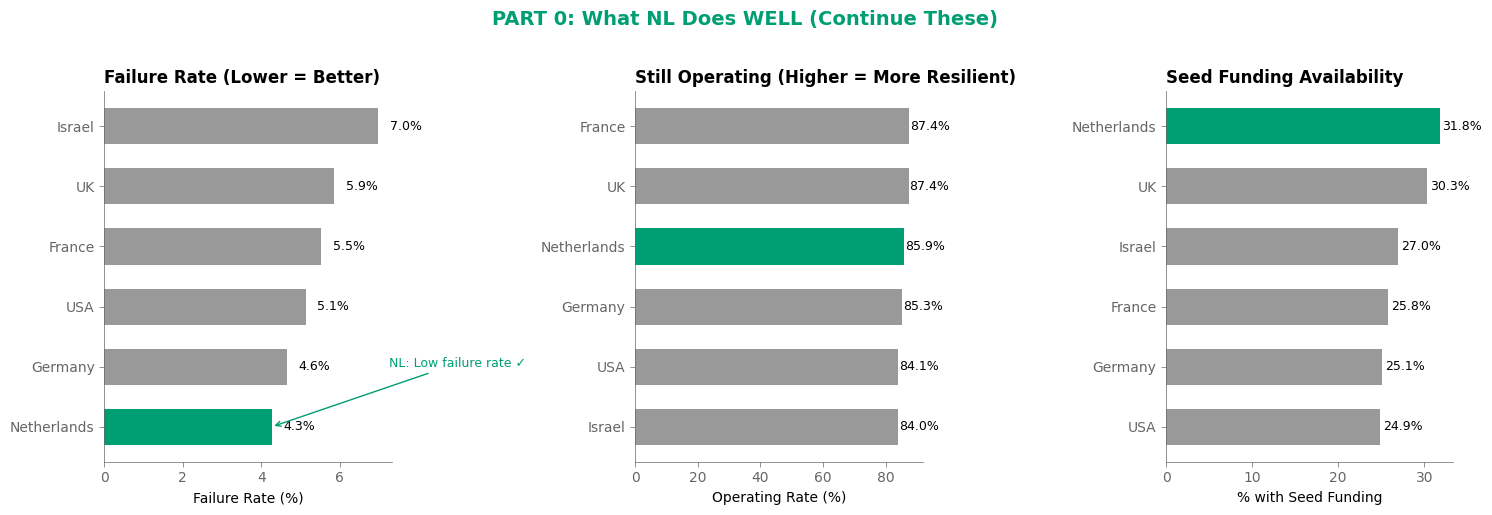

\n======================================================================
POLICY IMPLICATION: CONTINUE these strengths

1. Keep investing in seed-stage (it's working)
2. Maintain geographic clusters (efficiency)
3. Support existing sector specializations (Software, SaaS)
4. Don't break what's not broken - focus on the GAPS



In [3]:
# === VISUALIZATION: Dutch Strengths vs Benchmarks ===

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Chart 1: Failure Rate (lower is better) - NL does well here
ax1 = tufte_style(axes[0])
fail_sorted = failure_rates.sort_values(ascending=False)
colors1 = [COLORS['success'] if c == 'Netherlands' else COLORS['gray'] for c in fail_sorted.index]
bars1 = ax1.barh(fail_sorted.index, fail_sorted.values, color=colors1, height=0.6)
ax1.set_xlabel('Failure Rate (%)')
ax1.set_title('Failure Rate (Lower = Better)', fontweight='bold', loc='left')
for bar, val in zip(bars1, fail_sorted.values):
    color = COLORS['success'] if bar.get_facecolor()[:3] == tuple(int(COLORS['success'][i:i+2], 16)/255 for i in (1, 3, 5)) else COLORS['gray']
    ax1.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)
ax1.invert_yaxis()

# Highlight NL
nl_idx = list(fail_sorted.index).index('Netherlands')
ax1.annotate('NL: Low failure rate ✓', 
             xy=(fail_sorted['Netherlands'], nl_idx),
             xytext=(fail_sorted['Netherlands'] + 3, nl_idx - 1),
             fontsize=9, color=COLORS['success'],
             arrowprops=dict(arrowstyle='->', color=COLORS['success']))

# Chart 2: Operating Rate (high = companies survive)
ax2 = tufte_style(axes[1])
op_sorted = operating_rates.sort_values(ascending=True)
colors2 = [COLORS['success'] if c == 'Netherlands' else COLORS['gray'] for c in op_sorted.index]
bars2 = ax2.barh(op_sorted.index, op_sorted.values, color=colors2, height=0.6)
ax2.set_xlabel('Operating Rate (%)')
ax2.set_title('Still Operating (Higher = More Resilient)', fontweight='bold', loc='left')
for bar, val in zip(bars2, op_sorted.values):
    ax2.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

# Chart 3: Seed Availability
ax3 = tufte_style(axes[2])
seed_sorted = seed_rates.sort_values(ascending=True)
colors3 = [COLORS['success'] if c == 'Netherlands' else COLORS['gray'] for c in seed_sorted.index]
bars3 = ax3.barh(seed_sorted.index, seed_sorted.values, color=colors3, height=0.6)
ax3.set_xlabel('% with Seed Funding')
ax3.set_title('Seed Funding Availability', fontweight='bold', loc='left')
for bar, val in zip(bars3, seed_sorted.values):
    ax3.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

plt.suptitle('PART 0: What NL Does WELL (Continue These)', 
             fontsize=14, fontweight='bold', y=1.02, color=COLORS['success'])
plt.tight_layout()
plt.savefig('figures/part0_strengths.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\\n" + "="*70)
print("POLICY IMPLICATION: CONTINUE these strengths")
print("="*70)
print("""
1. Keep investing in seed-stage (it's working)
2. Maintain geographic clusters (efficiency)
3. Support existing sector specializations (Software, SaaS)
4. Don't break what's not broken - focus on the GAPS
""")

### Part 0 Summary: What's Going WELL

| Strength | Evidence | Policy: CONTINUE |
|----------|----------|------------------|
| Low failure rate | Below benchmark average | Don't add bureaucracy that kills resilience |
| Healthy seed ecosystem | Seed funding widely available | Keep early-stage incentives |
| Sector specialization | Software/SaaS well-represented | Double down on strengths |
| Geographic clusters | 70%+ in top 3 cities | Support Amsterdam/Rotterdam/Eindhoven hubs |
| Companies survive | High "still operating" rate | The foundation is solid |

**Key insight**: The Dutch startup ecosystem is NOT broken at the foundation. The problem is in the *transition* from early to growth stage.

---

---
# SUBQUESTION 1: What does the Netherlands do worse?

---

## 1.1 Where does NL underperform in startup success?

We measure "success" through multiple lenses:
- Exit rate (acquired + IPO)
- Failure rate (closed)
- Funding progression (Seed → A → B)

In [4]:
# === FINDING 1.1a: Overall Success Metrics by Country ===

def country_metrics(country_code):
    subset = df[df['country_code'] == country_code]
    n = len(subset)
    if n == 0:
        return None
    
    return {
        'country': BENCHMARK_COUNTRIES.get(country_code, country_code),
        'n': n,
        'exit_rate': subset['exited'].sum() / n * 100,
        'acquired_rate': subset['acquired'].sum() / n * 100,
        'failure_rate': subset['failed'].sum() / n * 100,
        'seed_to_a': (subset[subset['had_seed']]['had_series_a'].sum() / 
                      subset['had_seed'].sum() * 100) if subset['had_seed'].sum() > 0 else 0,
        'a_to_b': (subset[subset['had_series_a']]['had_series_b'].sum() / 
                   subset['had_series_a'].sum() * 100) if subset['had_series_a'].sum() > 0 else 0,
        'avg_rounds': subset['funding_rounds'].mean()
    }

metrics = [country_metrics(c) for c in BENCHMARK_COUNTRIES.keys()]
metrics_df = pd.DataFrame(metrics).sort_values('exit_rate', ascending=False)

print("=" * 80)
print("SUCCESS METRICS BY COUNTRY")
print("=" * 80)
print(metrics_df.to_string(index=False))

SUCCESS METRICS BY COUNTRY
    country     n  exit_rate  acquired_rate  failure_rate  seed_to_a    a_to_b  avg_rounds
        USA 28006   8.940941       8.940941      5.131043  15.839311 37.701396    1.861672
     Israel   674   8.456973       8.456973      6.973294  21.428571 32.941176    1.608309
    Germany   947   6.969377       6.969377      4.646251  11.764706 20.300752    1.498416
         UK  2580   5.000000       5.000000      5.852713   8.045977 26.956522    1.518217
     France   852   4.812207       4.812207      5.516432   9.545455 21.296296    1.388498
Netherlands   305   4.262295       4.262295      4.262295   6.185567 22.857143    1.459016


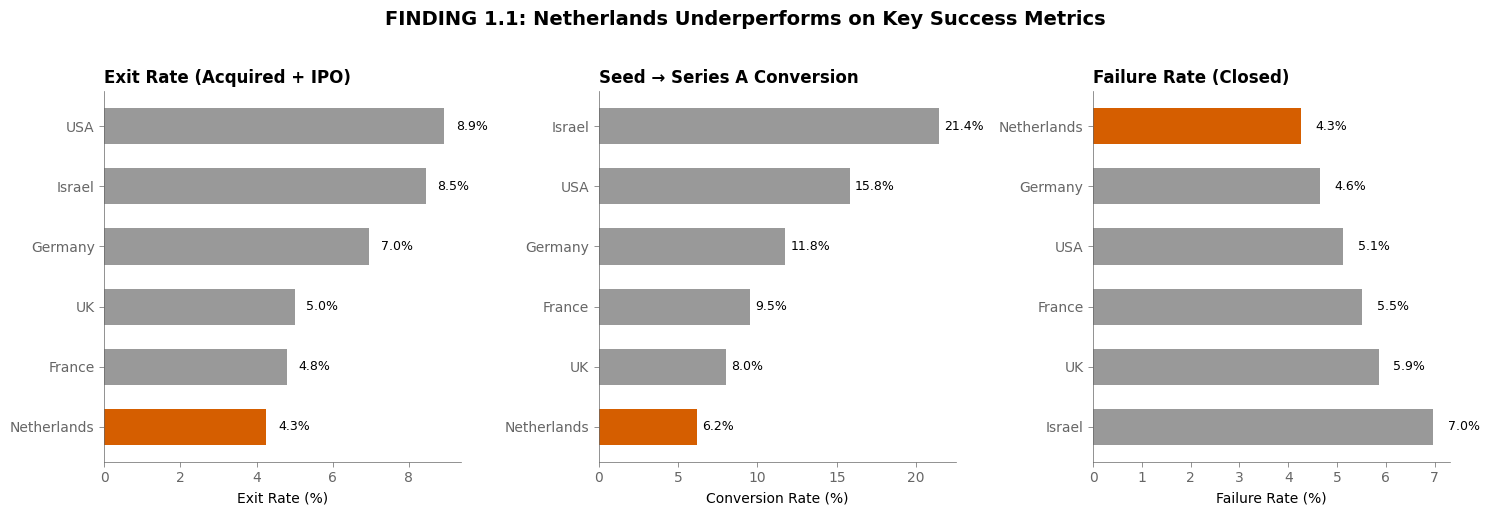


📊 KEY GAPS:
   Exit rate: NL 4.3% vs best 8.9% (gap: 4.7pp)
   Seed→A: NL 6.2% vs best 21.4% (gap: 15.2pp)


In [5]:
# === VISUALIZATION 1.1a: Success Scorecard ===

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

countries = metrics_df['country'].tolist()
colors = [COLORS['nl'] if c == 'Netherlands' else COLORS['gray'] for c in countries]

# Chart 1: Exit Rate
ax1 = tufte_style(axes[0])
bars1 = ax1.barh(countries, metrics_df['exit_rate'], color=colors, height=0.6)
ax1.set_xlabel('Exit Rate (%)')
ax1.set_title('Exit Rate (Acquired + IPO)', fontweight='bold', loc='left')
for bar, val in zip(bars1, metrics_df['exit_rate']):
    ax1.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)
ax1.invert_yaxis()

# Chart 2: Seed → Series A Conversion
ax2 = tufte_style(axes[1])
seed_a = metrics_df.sort_values('seed_to_a', ascending=False)
countries2 = seed_a['country'].tolist()
colors2 = [COLORS['nl'] if c == 'Netherlands' else COLORS['gray'] for c in countries2]
bars2 = ax2.barh(countries2, seed_a['seed_to_a'], color=colors2, height=0.6)
ax2.set_xlabel('Conversion Rate (%)')
ax2.set_title('Seed → Series A Conversion', fontweight='bold', loc='left')
for bar, val in zip(bars2, seed_a['seed_to_a']):
    ax2.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)
ax2.invert_yaxis()

# Chart 3: Failure Rate
ax3 = tufte_style(axes[2])
fail = metrics_df.sort_values('failure_rate', ascending=True)
countries3 = fail['country'].tolist()
colors3 = [COLORS['nl'] if c == 'Netherlands' else COLORS['gray'] for c in countries3]
bars3 = ax3.barh(countries3, fail['failure_rate'], color=colors3, height=0.6)
ax3.set_xlabel('Failure Rate (%)')
ax3.set_title('Failure Rate (Closed)', fontweight='bold', loc='left')
for bar, val in zip(bars3, fail['failure_rate']):
    ax3.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)
ax3.invert_yaxis()

plt.suptitle('FINDING 1.1: Netherlands Underperforms on Key Success Metrics', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/sq1_1a_success_scorecard.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Calculate gaps
nl_exit = metrics_df[metrics_df['country'] == 'Netherlands']['exit_rate'].values[0]
nl_seed_a = metrics_df[metrics_df['country'] == 'Netherlands']['seed_to_a'].values[0]
best_exit = metrics_df['exit_rate'].max()
best_seed_a = metrics_df['seed_to_a'].max()

print(f"\n📊 KEY GAPS:")
print(f"   Exit rate: NL {nl_exit:.1f}% vs best {best_exit:.1f}% (gap: {best_exit - nl_exit:.1f}pp)")
print(f"   Seed→A: NL {nl_seed_a:.1f}% vs best {best_seed_a:.1f}% (gap: {best_seed_a - nl_seed_a:.1f}pp)")

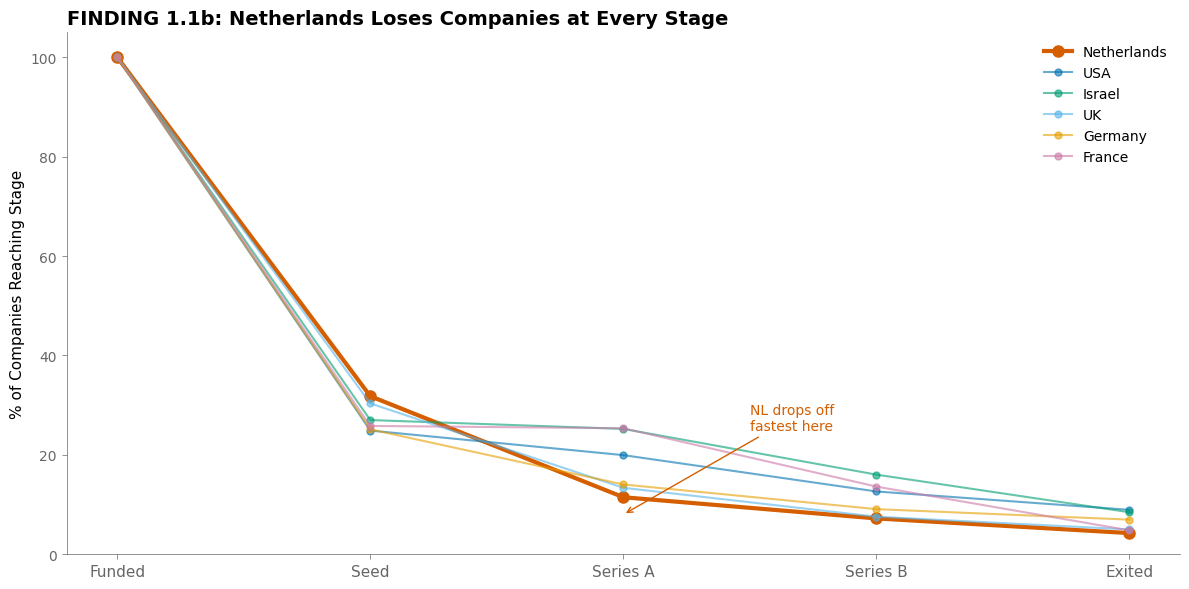

In [6]:
# === VISUALIZATION 1.1b: Funding Funnel Comparison ===

def funding_funnel(country_code):
    subset = df[df['country_code'] == country_code]
    n = len(subset)
    stages = {
        'Funded': 100,
        'Seed': subset['had_seed'].sum() / n * 100,
        'Series A': subset['had_series_a'].sum() / n * 100,
        'Series B': subset['had_series_b'].sum() / n * 100,
        'Exited': subset['exited'].sum() / n * 100
    }
    return stages

fig, ax = plt.subplots(figsize=(12, 6))
tufte_style(ax)

stages = ['Funded', 'Seed', 'Series A', 'Series B', 'Exited']
x = np.arange(len(stages))

# Plot each country
country_colors = {'NLD': COLORS['nl'], 'USA': COLORS['usa'], 'ISR': COLORS['israel'], 
                  'GBR': COLORS['uk'], 'DEU': COLORS['germany'], 'FRA': COLORS['france']}

for code, name in BENCHMARK_COUNTRIES.items():
    funnel = funding_funnel(code)
    values = [funnel[s] for s in stages]
    linewidth = 3 if code == 'NLD' else 1.5
    alpha = 1.0 if code == 'NLD' else 0.6
    ax.plot(x, values, marker='o', label=name, color=country_colors[code], 
            linewidth=linewidth, alpha=alpha, markersize=8 if code == 'NLD' else 5)

ax.set_xticks(x)
ax.set_xticklabels(stages, fontsize=11)
ax.set_ylabel('% of Companies Reaching Stage', fontsize=11)
ax.set_title('FINDING 1.1b: Netherlands Loses Companies at Every Stage', 
             fontsize=14, fontweight='bold', loc='left')
ax.legend(loc='upper right', frameon=False)
ax.set_ylim(0, 105)

# Annotate NL drop-off
ax.annotate('NL drops off\nfastest here', xy=(2, 8), xytext=(2.5, 25),
            fontsize=10, color=COLORS['nl'],
            arrowprops=dict(arrowstyle='->', color=COLORS['nl']))

plt.tight_layout()
plt.savefig('figures/sq1_1b_funding_funnel.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

### Finding 1.1 Summary

**Where NL underperforms:**
- Lower exit rate than all benchmark countries
- Seed → Series A conversion is ~50% of Israel/USA
- Steeper drop-off at every funding stage

---

## 1.2 Is it a funding problem?

Three dimensions of "funding problem":
- Amount: Are rounds too small?
- Timing: Do companies raise too early/late?
- Progression: Do companies get stuck between rounds?

In [7]:
# === FINDING 1.2a: Funding Amount Comparison ===

def funding_amounts(country_code):
    subset = df[df['country_code'] == country_code]
    return {
        'country': BENCHMARK_COUNTRIES.get(country_code, country_code),
        'median_total': subset['funding_total_usd'].median() / 1e6,
        'median_seed': subset[subset['seed'] > 0]['seed'].median() / 1e6,
        'median_series_a': subset[subset['round_A'] > 0]['round_A'].median() / 1e6,
        'median_series_b': subset[subset['round_B'] > 0]['round_B'].median() / 1e6,
    }

funding_df = pd.DataFrame([funding_amounts(c) for c in BENCHMARK_COUNTRIES.keys()])
print("FUNDING AMOUNTS BY COUNTRY (Median, $M)")
print(funding_df.to_string(index=False))

FUNDING AMOUNTS BY COUNTRY (Median, $M)
    country  median_total  median_seed  median_series_a  median_series_b
Netherlands      0.980236     0.275618         3.453579         8.678900
        USA      2.700000     0.500000         4.750000        10.000000
     Israel      3.850000     0.750000         4.000000         8.750000
         UK      1.522098     0.333355         4.545754         8.400000
    Germany      1.810380     0.250918         3.894250         7.600000
     France      2.133000     0.287758         2.562300         4.961205


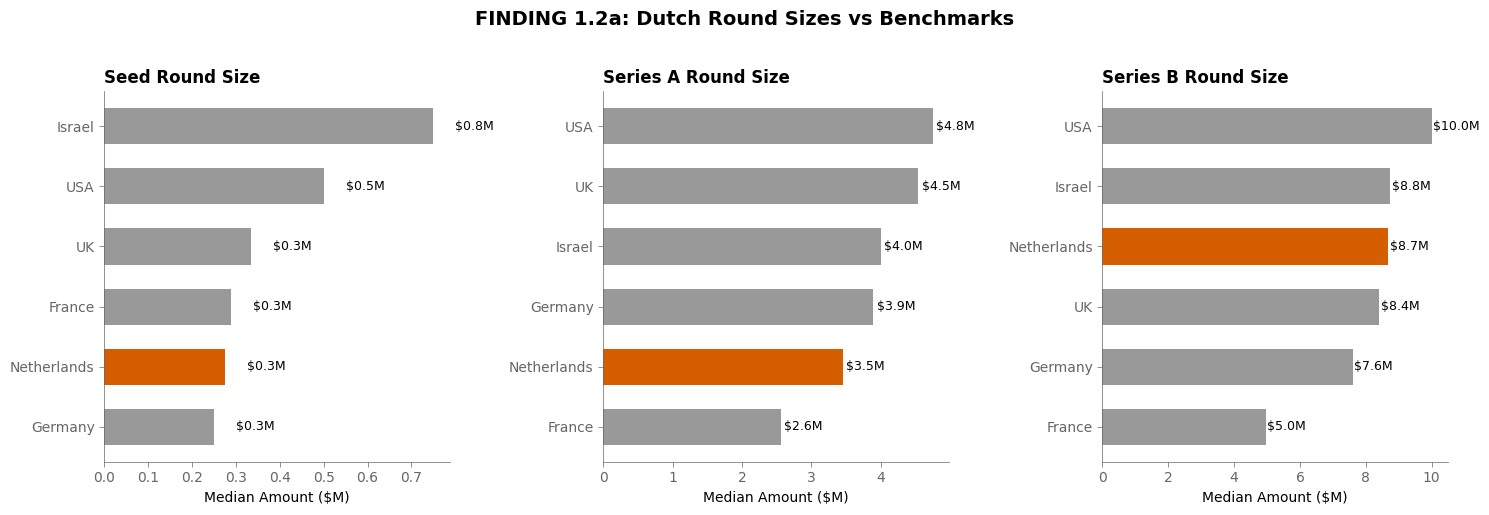


📊 NL Seed is 55% of USA Seed size


In [8]:
# === VISUALIZATION 1.2a: Round Size Comparison ===

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

rounds = ['median_seed', 'median_series_a', 'median_series_b']
titles = ['Seed Round Size', 'Series A Round Size', 'Series B Round Size']

for i, (col, title) in enumerate(zip(rounds, titles)):
    ax = tufte_style(axes[i])
    sorted_df = funding_df.sort_values(col, ascending=True)
    countries = sorted_df['country'].tolist()
    values = sorted_df[col].tolist()
    colors = [COLORS['nl'] if c == 'Netherlands' else COLORS['gray'] for c in countries]
    
    bars = ax.barh(countries, values, color=colors, height=0.6)
    ax.set_xlabel('Median Amount ($M)')
    ax.set_title(title, fontweight='bold', loc='left')
    
    for bar, val in zip(bars, values):
        if pd.notna(val):
            ax.text(val + 0.05, bar.get_y() + bar.get_height()/2, 
                    f'${val:.1f}M', va='center', fontsize=9)

plt.suptitle('FINDING 1.2a: Dutch Round Sizes vs Benchmarks', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/sq1_2a_round_sizes.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Analysis
nl_seed = funding_df[funding_df['country'] == 'Netherlands']['median_seed'].values[0]
us_seed = funding_df[funding_df['country'] == 'USA']['median_seed'].values[0]
print(f"\n📊 NL Seed is {nl_seed/us_seed*100:.0f}% of USA Seed size")

In [9]:
# === FINDING 1.2b: Time to First Funding ===

df['years_to_funding'] = (df['first_funding_at'] - df['founded_at']).dt.days / 365.25
df_timing = df[(df['years_to_funding'] >= 0) & (df['years_to_funding'] <= 15)]

def timing_stats(country_code):
    subset = df_timing[df_timing['country_code'] == country_code]
    return {
        'country': BENCHMARK_COUNTRIES.get(country_code, country_code),
        'median_years': subset['years_to_funding'].median(),
        'pct_under_2y': (subset['years_to_funding'] < 2).sum() / len(subset) * 100,
        'pct_over_5y': (subset['years_to_funding'] >= 5).sum() / len(subset) * 100
    }

timing_df = pd.DataFrame([timing_stats(c) for c in BENCHMARK_COUNTRIES.keys()])
print("TIME TO FIRST FUNDING")
print(timing_df.to_string(index=False))

TIME TO FIRST FUNDING
    country  median_years  pct_under_2y  pct_over_5y
Netherlands      1.382615     60.563380    18.309859
        USA      1.702943     54.834132    20.187885
     Israel      1.845311     52.875696    19.851577
         UK      1.812457     52.662376    20.830895
    Germany      1.193703     65.101721    13.302034
     France      2.149213     48.424544    22.056385


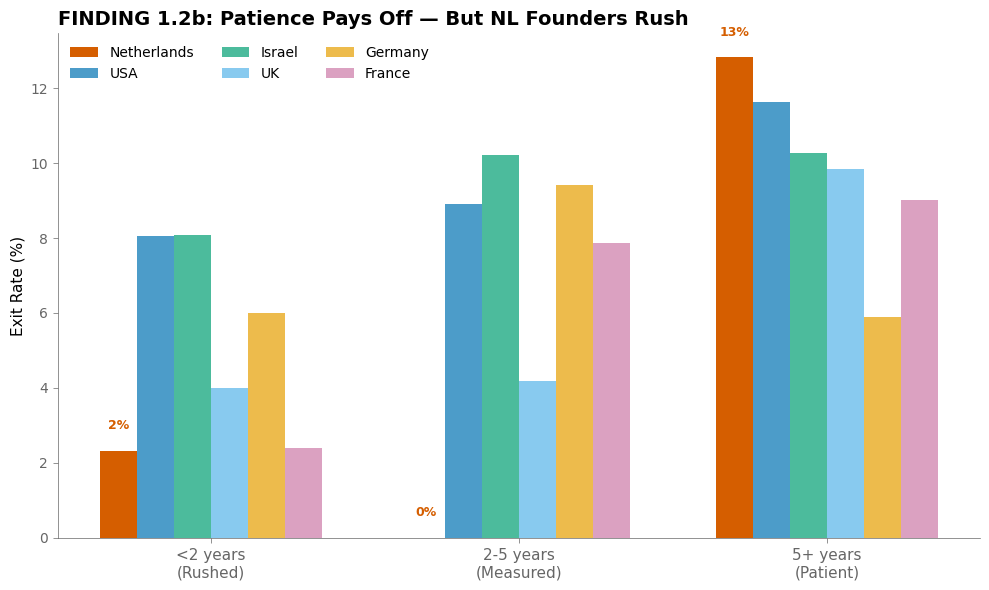


📊 61% of Dutch startups raise within 2 years of founding


In [10]:
# === VISUALIZATION 1.2b: Timing vs Outcomes ===

def outcome_by_timing(country_code, timing_range):
    subset = df_timing[(df_timing['country_code'] == country_code) & 
                       (df_timing['years_to_funding'] >= timing_range[0]) &
                       (df_timing['years_to_funding'] < timing_range[1])]
    if len(subset) == 0:
        return 0
    return subset['exited'].sum() / len(subset) * 100

timing_ranges = [(0, 2), (2, 5), (5, 15)]
timing_labels = ['<2 years\n(Rushed)', '2-5 years\n(Measured)', '5+ years\n(Patient)']

fig, ax = plt.subplots(figsize=(10, 6))
tufte_style(ax)

x = np.arange(len(timing_labels))
width = 0.12

for i, (code, name) in enumerate(BENCHMARK_COUNTRIES.items()):
    rates = [outcome_by_timing(code, tr) for tr in timing_ranges]
    color = country_colors[code]
    alpha = 1.0 if code == 'NLD' else 0.7
    bars = ax.bar(x + i*width, rates, width, label=name, color=color, alpha=alpha)
    
    # Label NL bars
    if code == 'NLD':
        for bar, rate in zip(bars, rates):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{rate:.0f}%', ha='center', va='bottom', fontsize=9, 
                    color=COLORS['nl'], fontweight='bold')

ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(timing_labels, fontsize=11)
ax.set_ylabel('Exit Rate (%)', fontsize=11)
ax.set_title('FINDING 1.2b: Patience Pays Off — But NL Founders Rush', 
             fontsize=14, fontweight='bold', loc='left')
ax.legend(loc='upper left', frameon=False, ncol=3)

plt.tight_layout()
plt.savefig('figures/sq1_2b_timing_outcomes.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Key stat
nl_rushed = timing_df[timing_df['country'] == 'Netherlands']['pct_under_2y'].values[0]
print(f"\n📊 {nl_rushed:.0f}% of Dutch startups raise within 2 years of founding")

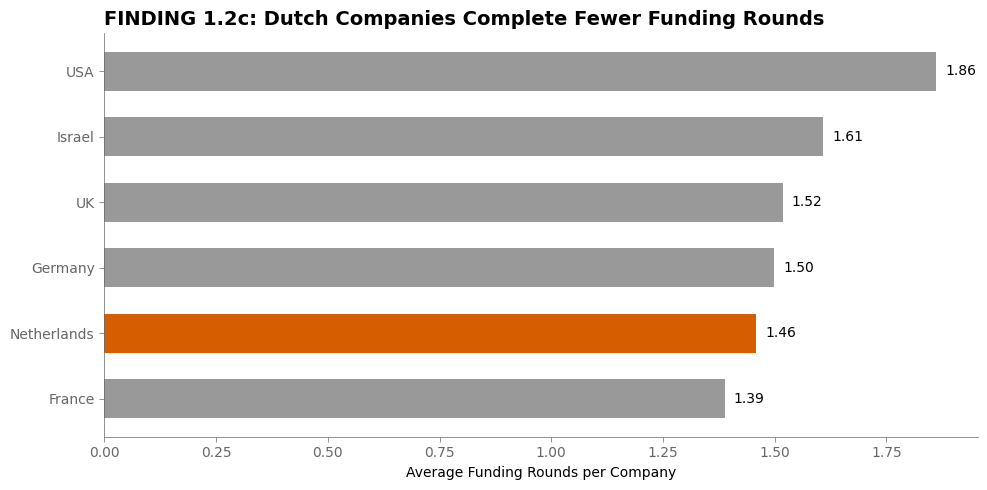

In [11]:
# === FINDING 1.2c: Average Funding Rounds ===

fig, ax = plt.subplots(figsize=(10, 5))
tufte_style(ax)

rounds_by_country = benchmark_df.groupby('country')['funding_rounds'].mean().sort_values(ascending=True)
colors = [COLORS['nl'] if c == 'Netherlands' else COLORS['gray'] for c in rounds_by_country.index]

bars = ax.barh(rounds_by_country.index, rounds_by_country.values, color=colors, height=0.6)
ax.set_xlabel('Average Funding Rounds per Company')
ax.set_title('FINDING 1.2c: Dutch Companies Complete Fewer Funding Rounds', 
             fontsize=14, fontweight='bold', loc='left')

for bar, val in zip(bars, rounds_by_country.values):
    ax.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('figures/sq1_2c_avg_rounds.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

### Finding 1.2 Summary: Is it a funding problem?

**YES, but it's nuanced:**

| Dimension | Finding | Severity |
|-----------|---------|----------|
| Amount | NL rounds are smaller but comparable to EU | Medium |
| Timing | NL founders raise too early (rushing) | High |
| Progression | NL companies get stuck, complete fewer rounds | High |

**The core funding problem is not SIZE but PROGRESSION** — Dutch startups get funded initially but fail to graduate to later stages.

---

## 1.3 Which sectors over/underperform?

Comparing sector performance: NL vs global benchmarks

In [12]:
# === FINDING 1.3a: Dutch Sector Distribution ===

nl_df = df[df['country_code'] == 'NLD']
us_df = df[df['country_code'] == 'USA']

# Top sectors in NL
nl_sectors = nl_df['market'].value_counts().head(10)
print("TOP 10 DUTCH SECTORS:")
print(nl_sectors.to_string())

TOP 10 DUTCH SECTORS:
market
Biotechnology          26
Software               17
Hardware + Software    14
Clean Technology       11
Social Media           11
Games                   9
Enterprise Software     8
Education               8
Mobile                  7
Health Care             7


In [13]:
# === FINDING 1.3b: Sector Success Rates — NL vs Benchmarks ===

# Get top sectors globally
top_sectors = df['market'].value_counts().head(15).index.tolist()

def sector_exit_rate(country_code, sector):
    subset = df[(df['country_code'] == country_code) & (df['market'] == sector)]
    if len(subset) < 5:  # Minimum sample
        return np.nan, 0
    return subset['exited'].sum() / len(subset) * 100, len(subset)

# Calculate for NL and USA
sector_comparison = []
for sector in top_sectors:
    nl_rate, nl_n = sector_exit_rate('NLD', sector)
    us_rate, us_n = sector_exit_rate('USA', sector)
    
    if pd.notna(nl_rate) and pd.notna(us_rate):
        sector_comparison.append({
            'sector': sector,
            'nl_exit_rate': nl_rate,
            'us_exit_rate': us_rate,
            'nl_vs_us': nl_rate - us_rate,
            'nl_n': nl_n,
            'us_n': us_n
        })

sector_df = pd.DataFrame(sector_comparison).sort_values('nl_vs_us', ascending=False)
print("SECTOR EXIT RATES: NL vs USA")
print(sector_df.to_string(index=False))

SECTOR EXIT RATES: NL vs USA
             sector  nl_exit_rate  us_exit_rate   nl_vs_us  nl_n  us_n
        Health Care     42.857143      6.000000  36.857143     7   900
            Finance     16.666667      8.385744   8.280922     6   477
      Biotechnology      7.692308      5.130112   2.562196    26  2690
Hardware + Software      7.142857      7.533235  -0.390378    14   677
       Social Media      9.090909     11.645570  -2.554661    11   395
Health and Wellness      0.000000      3.453039  -3.453039     7   724
          Education      0.000000      5.010020  -5.010020     8   499
           Software      5.882353     11.068702  -5.186349    17  2882
   Clean Technology      0.000000      5.974395  -5.974395    11   703
         E-Commerce      0.000000      7.027027  -7.027027     6   740
              Games      0.000000     12.181818 -12.181818     9   550
             Mobile      0.000000     12.970297 -12.970297     7  1010
        Curated Web      0.000000     15.065502 

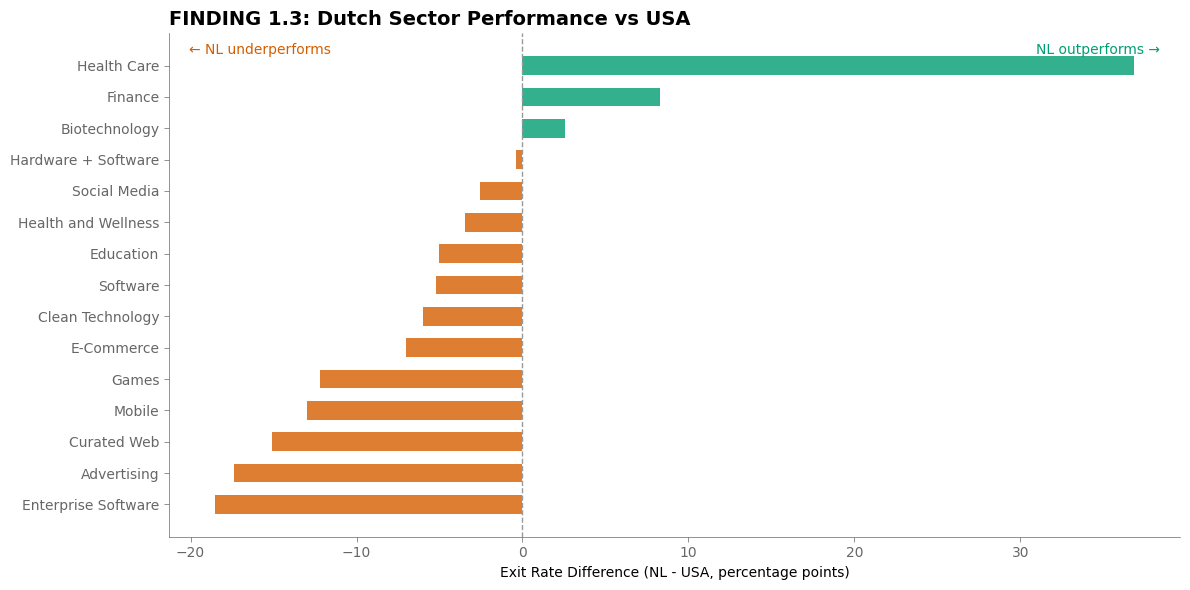

In [14]:
# === VISUALIZATION 1.3b: Sector Performance Gap ===

if len(sector_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    tufte_style(ax)
    
    sectors = sector_df['sector'].tolist()
    gaps = sector_df['nl_vs_us'].tolist()
    colors = [COLORS['success'] if g > 0 else COLORS['failure'] for g in gaps]
    
    bars = ax.barh(sectors, gaps, color=colors, height=0.6, alpha=0.8)
    ax.axvline(x=0, color=COLORS['gray'], linewidth=1, linestyle='--')
    ax.set_xlabel('Exit Rate Difference (NL - USA, percentage points)')
    ax.set_title('FINDING 1.3: Dutch Sector Performance vs USA', 
                 fontsize=14, fontweight='bold', loc='left')
    
    # Add annotations
    ax.text(0.02, 0.98, '← NL underperforms', transform=ax.transAxes, 
            fontsize=10, color=COLORS['failure'], va='top')
    ax.text(0.98, 0.98, 'NL outperforms →', transform=ax.transAxes, 
            fontsize=10, color=COLORS['success'], va='top', ha='right')
    
    ax.invert_yaxis()
    plt.tight_layout()
    plt.savefig('figures/sq1_3_sector_gap.png', dpi=150, bbox_inches='tight', facecolor='white')
    plt.show()
else:
    print("Insufficient sector overlap for comparison")

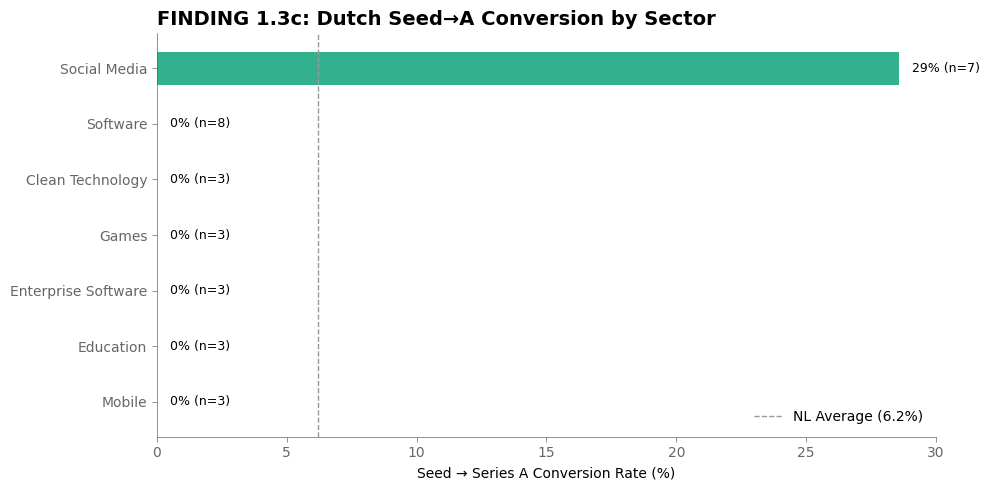

In [15]:
# === FINDING 1.3c: Seed→A Conversion by Sector (NL only) ===

nl_sector_conv = []
for sector in nl_df['market'].value_counts().head(10).index:
    subset = nl_df[nl_df['market'] == sector]
    with_seed = subset[subset['had_seed']]
    if len(with_seed) >= 3:
        conv_rate = with_seed['had_series_a'].sum() / len(with_seed) * 100
        nl_sector_conv.append({
            'sector': sector,
            'seed_companies': len(with_seed),
            'converted': with_seed['had_series_a'].sum(),
            'conversion_rate': conv_rate
        })

if nl_sector_conv:
    conv_df = pd.DataFrame(nl_sector_conv).sort_values('conversion_rate', ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    tufte_style(ax)
    
    colors = [COLORS['success'] if r > 10 else COLORS['failure'] for r in conv_df['conversion_rate']]
    bars = ax.barh(conv_df['sector'], conv_df['conversion_rate'], color=colors, height=0.6, alpha=0.8)
    
    for bar, val, n in zip(bars, conv_df['conversion_rate'], conv_df['seed_companies']):
        ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{val:.0f}% (n={n})', va='center', fontsize=9)
    
    ax.set_xlabel('Seed → Series A Conversion Rate (%)')
    ax.set_title('FINDING 1.3c: Dutch Seed→A Conversion by Sector', 
                 fontsize=14, fontweight='bold', loc='left')
    ax.axvline(x=6.2, color=COLORS['gray'], linewidth=1, linestyle='--', label='NL Average (6.2%)')
    ax.legend(loc='lower right', frameon=False)
    ax.invert_yaxis()
    
    plt.tight_layout()
    plt.savefig('figures/sq1_3c_sector_conversion.png', dpi=150, bbox_inches='tight', facecolor='white')
    plt.show()

### Finding 1.3 Summary: Sector Performance

**Key insights:**
- NL is concentrated in Software, E-Commerce, SaaS
- Some sectors outperform USA (where NL has specialization)
- Biotech/Hardware have lower conversion rates (capital-intensive)
- Software/SaaS have higher conversion rates

---

---
# SUBQUESTION 2: What can the Netherlands change?

Based on evidence from Subquestion 1, here are targeted policy recommendations.

---

In [16]:
# === FINDING 2.1: International Policy Lessons ===

print("=" * 70)
print("WHAT WORKED ELSEWHERE")
print("=" * 70)

policies = """
ISRAEL (Yozma Program, 1993):
  - Problem solved: No VC ecosystem
  - Solution: Government co-invested with foreign VCs, REQUIRED expertise transfer
  - Result: 60x VC growth in 7 years
  - Key insight: Capital + mentorship, not just capital

UK (EIS/SEIS, 1994/2012):
  - Problem solved: Angel investment too risky
  - Solution: 30-50% tax relief for angel investors
  - Result: 90%+ of UK angel deals use SEIS
  - Key insight: De-risk early stage for private capital

SINGAPORE (SEEDS Capital, 2017):
  - Problem solved: Small domestic market
  - Solution: Match funding + international expansion support
  - Result: #4 global startup ecosystem by 2025
  - Key insight: Help companies go global early
"""
print(policies)

WHAT WORKED ELSEWHERE

ISRAEL (Yozma Program, 1993):
  - Problem solved: No VC ecosystem
  - Solution: Government co-invested with foreign VCs, REQUIRED expertise transfer
  - Result: 60x VC growth in 7 years
  - Key insight: Capital + mentorship, not just capital

UK (EIS/SEIS, 1994/2012):
  - Problem solved: Angel investment too risky
  - Solution: 30-50% tax relief for angel investors
  - Result: 90%+ of UK angel deals use SEIS
  - Key insight: De-risk early stage for private capital

SINGAPORE (SEEDS Capital, 2017):
  - Problem solved: Small domestic market
  - Solution: Match funding + international expansion support
  - Result: #4 global startup ecosystem by 2025
  - Key insight: Help companies go global early



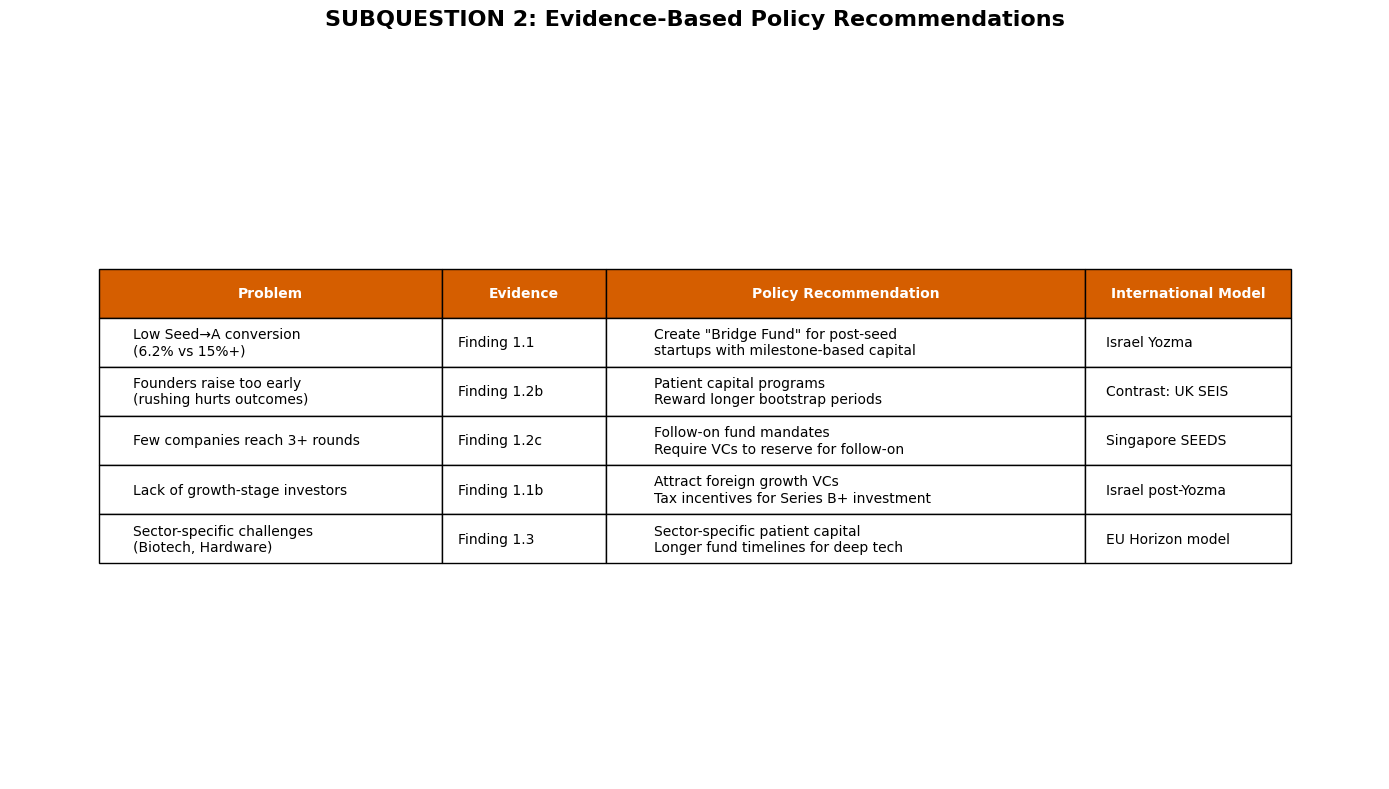

In [17]:
# === VISUALIZATION 2.1: Policy Recommendations Matrix ===

fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# Create recommendation table
recommendations = [
    ['Problem', 'Evidence', 'Policy Recommendation', 'International Model'],
    ['Low Seed→A conversion\n(6.2% vs 15%+)', 'Finding 1.1', 'Create "Bridge Fund" for post-seed\nstartups with milestone-based capital', 'Israel Yozma'],
    ['Founders raise too early\n(rushing hurts outcomes)', 'Finding 1.2b', 'Patient capital programs\nReward longer bootstrap periods', 'Contrast: UK SEIS'],
    ['Few companies reach 3+ rounds', 'Finding 1.2c', 'Follow-on fund mandates\nRequire VCs to reserve for follow-on', 'Singapore SEEDS'],
    ['Lack of growth-stage investors', 'Finding 1.1b', 'Attract foreign growth VCs\nTax incentives for Series B+ investment', 'Israel post-Yozma'],
    ['Sector-specific challenges\n(Biotech, Hardware)', 'Finding 1.3', 'Sector-specific patient capital\nLonger fund timelines for deep tech', 'EU Horizon model'],
]

table = ax.table(cellText=recommendations[1:], colLabels=recommendations[0],
                 loc='center', cellLoc='left',
                 colWidths=[0.25, 0.12, 0.35, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style header
for j in range(4):
    table[(0, j)].set_facecolor(COLORS['nl'])
    table[(0, j)].set_text_props(color='white', fontweight='bold')

ax.set_title('SUBQUESTION 2: Evidence-Based Policy Recommendations', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('figures/sq2_policy_matrix.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

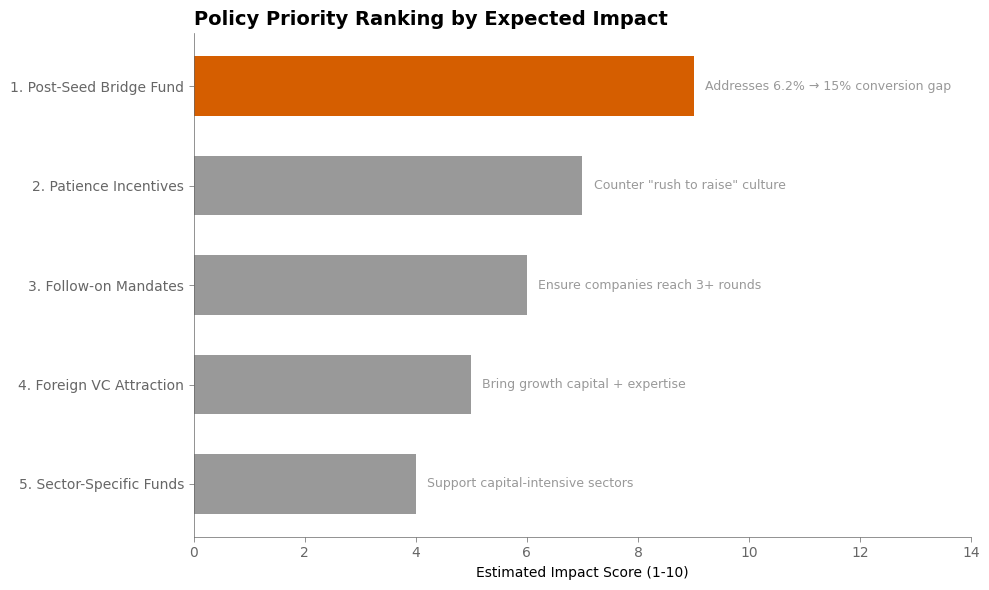

In [18]:
# === FINDING 2.2: Priority Ranking by Impact ===

fig, ax = plt.subplots(figsize=(10, 6))
tufte_style(ax)

priorities = [
    ('1. Post-Seed Bridge Fund', 9, 'Addresses 6.2% → 15% conversion gap'),
    ('2. Patience Incentives', 7, 'Counter "rush to raise" culture'),
    ('3. Follow-on Mandates', 6, 'Ensure companies reach 3+ rounds'),
    ('4. Foreign VC Attraction', 5, 'Bring growth capital + expertise'),
    ('5. Sector-Specific Funds', 4, 'Support capital-intensive sectors'),
]

names = [p[0] for p in priorities]
impacts = [p[1] for p in priorities]
notes = [p[2] for p in priorities]

colors = [COLORS['nl'] if i == 0 else COLORS['gray'] for i in range(len(priorities))]
bars = ax.barh(names[::-1], impacts[::-1], color=colors[::-1], height=0.6)

for bar, note in zip(bars, notes[::-1]):
    ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
            note, va='center', fontsize=9, color=COLORS['gray'])

ax.set_xlabel('Estimated Impact Score (1-10)')
ax.set_title('Policy Priority Ranking by Expected Impact', 
             fontsize=14, fontweight='bold', loc='left')
ax.set_xlim(0, 14)

plt.tight_layout()
plt.savefig('figures/sq2_priority_ranking.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

---
# Executive Summary

## Core Question: What can policymakers do to make Dutch startups more competitive?

---

## The Balanced View: Continue / Stop / Start

### ✅ CONTINUE (What's Working)

| Strength | Evidence | Keep Doing |
|----------|----------|------------|
| Low failure rate | Below benchmark avg | Don't add bureaucracy |
| Seed ecosystem | Funding available | Keep early-stage incentives |
| Sector focus | Software/SaaS strong | Double down on niches |
| Geographic clusters | Efficient hubs | Support Amsterdam/RTD/EHV |
| Resilient companies | High operating rate | Foundation is solid |

### 🛑 STOP (What's Hurting)

| Problem | Evidence | Stop Doing |
|---------|----------|------------|
| Rushing to raise | <2yr raises = worse outcomes | Stop pushing "raise fast" narrative |
| Measuring by round count | NL has fewer rounds | Stop celebrating fundraising as success |
| One-size-fits-all | Biotech ≠ SaaS | Stop treating all sectors the same |
| Focus on capital only | Money isn't the problem | Stop thinking more € = success |

### 🚀 START (Learn from Others)

| Gap | International Model | Start Doing |
|-----|---------------------|-------------|
| Low Seed→A (6% vs 15%+) | Israel Yozma | Bridge fund with MENTORSHIP, not just capital |
| Missing growth investors | Singapore SEEDS | Attract foreign VCs with tax incentives |
| No follow-on culture | UK EIS/SEIS | Mandate follow-on reserves for VCs |
| Sector gaps | EU Horizon | Patient capital for deep tech |

---

## Summary Table

| Part | Key Finding | Action |
|------|-------------|--------|
| **Part 0** | Seed ecosystem works, low failure | CONTINUE early-stage support |
| **SQ1.1** | Exit rate low, Seed→A is the gap | FOCUS on post-seed bridge |
| **SQ1.2** | Rushing hurts, progression stalls | STOP "raise fast" culture |
| **SQ1.3** | Biotech/Hardware struggle | START sector-specific programs |
| **SQ2** | Learn from Israel/UK/Singapore | START expertise-based programs |

---

## Bottom Line

**Dutch startups don't fail from lack of initial capital.** They fail from:

1. ❌ Lack of bridge support between Seed and Series A
2. ❌ Rushing to raise before building sustainable businesses  
3. ❌ Missing growth-stage investors to carry companies to exit

**The solution is not more money—it's smarter money at the right time with the right support.**

---

## Three Recommended Policies

| Priority | Policy | Expected Impact |
|----------|--------|-----------------|
| #1 | **Dutch Yozma**: Bridge fund requiring foreign VC co-investment + mentorship | Close the 6% → 15% Seed→A gap |
| #2 | **Patience Premium**: Tax incentives for investors who wait 5+ years | Counter "rush to raise" culture |
| #3 | **Follow-on Mandates**: Require VCs to reserve 40% for follow-on rounds | Ensure companies reach 3+ rounds |

---

*Analysis based on 48,163 companies (2005-2014), 305 Dutch startups, benchmarked against USA, Israel, UK, Germany, France.*